In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("./winequality-red.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,anhidrido_sulfuroso_libre,anhidrido_sulfuroso_total,densidad,ph,sulfatos,vol_alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data = data.rename(columns={"fixed acidity":"acidez_fija","volatile acidity":"acidez_volatil","citric acid":"acido_citrico",
                            "residual sugar":"azucar_residual","chlorides":"cloruros",
                            "free sulfur dioxide":"anhidrido_sulfuroso_libre",
                            "total sulfur dioxide":"anhidrido_sulfuroso_total","density":"densidad","pH":"ph",
                            "sulphates":"sulfatos","alcohol":"vol_alcohol","quality":"calidad"})

In [23]:
### Veremos si contenemos valores nulos
print(data.isnull().sum())

acidez_fija                  0
acidez_volatil               0
acido_citrico                0
azucar_residual              0
cloruros                     0
anhidrido_sulfuroso_libre    0
anhidrido_sulfuroso_total    0
densidad                     0
ph                           0
sulfatos                     0
vol_alcohol                  0
calidad                      0
dtype: int64


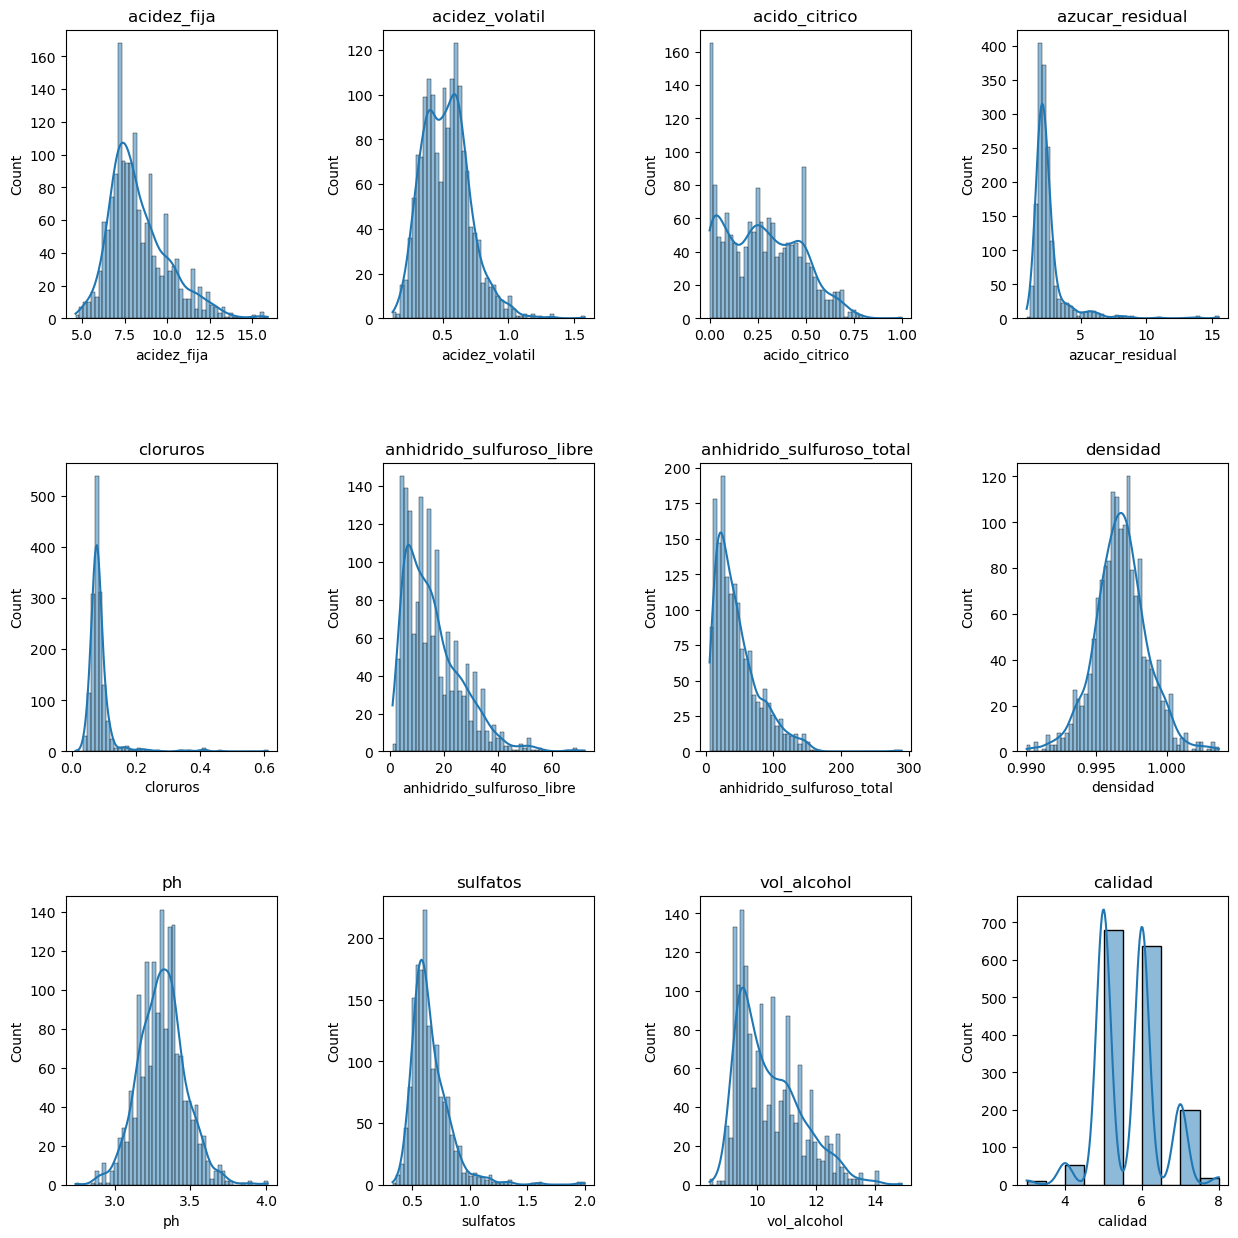

In [18]:
fig, ax = plt.subplots(nrows = 3 , ncols= 4 , figsize=(15,15))
fig.subplots_adjust(wspace = 0.5 , hspace = 0.5)

for i ,col in enumerate(data):
    if col == "calidad":
        nbins = 10 
    else:
        nbins = 50
    sns.histplot(x=col , data=data , ax=ax[i//4][i%4], bins=nbins, kde=True)
    ax[i//4][i%4].set_title(col)
    

* ## Vemos comose comportan los datos en forma grafica. 
    * **Acidez_fija** : Media = 8.31 
    * **Acidez_volatil** : Media = 0.52
    * **Acido_citrico** : Media = 0.27 
    * **Azucar_residual** : Media = 2.53
    * **Cloruros** : Media = 0.087
    * **Anhidrido_sulfuroso_libre** : Media = 15.87
    * **anhidrido_sulfuroso_total** : Media = 46.46
    * **Densidad** : Media = 0.99
    * **PH** : Media = 3.31 
    * **Sulfatos** : Media = 0.65 
    * **Volumen_alcohol** : Media = 10.42
    * **CALIDAD** : Media = 5.63

In [21]:
frecuencia_calidad = pd.Series(data["calidad"]).value_counts()
frecuencia_calidad

5    681
6    638
7    199
4     53
8     18
3     10
Name: calidad, dtype: int64

* ## Frecuencia de la calidad en los vinos. 
----

-

----
* ## Miraremos su correlación 

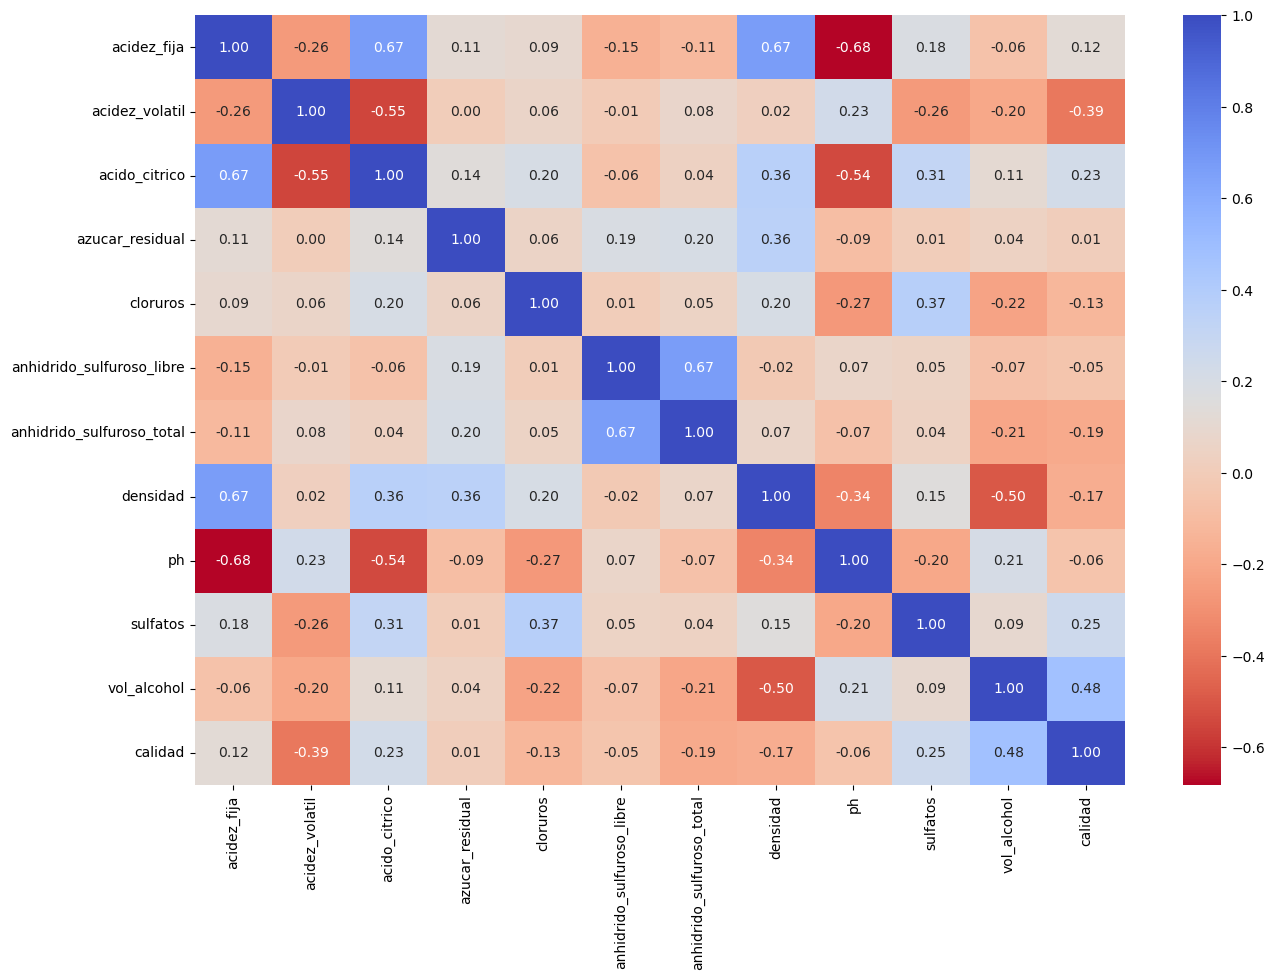

In [22]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt='.2f' , cmap=plt.cm.coolwarm_r)
plt.show()

In [25]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
X = data[['acidez_fija', 'acidez_volatil', 'acido_citrico','azucar_residual', 'cloruros', 'anhidrido_sulfuroso_libre',
          'anhidrido_sulfuroso_total', 'densidad', 'ph', 'sulfatos','vol_alcohol']]

y = data[["calidad"]]

In [34]:
#### Separamos los datos en entrenamiento y test
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [41]:
#### Creamos la instancia de KNN y luego lo entrenamos
knn = KNeighborsRegressor(n_neighbors=5) # 5 es el numero predeterminado , si agregamos mas creo que no es conveniente
knn.fit(X_train , y_train)

KNeighborsRegressor()

In [42]:
y_pred = knn.predict(X_test)

In [45]:
#### Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

##### Calculamo el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio (MSE): 0.5290833333333332
Coeficiente de determinación (R2): 0.16551455034604579


* ## Basándonos en los resultados que obtuvimos, el modelo de KNN que construimos parece tener un desempeño limitado para este conjunto de datos en particular.
-----

---
* # REGRESIÓN LINEAL MULTIPLE.
    * ### Primero haremos una regresión con "RFE" (usar las variables que python considere mejor, es decir cuales son las que mejor se ajustan al modelo). Luego con todas las variables predictoras

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [49]:
#### Tenemos 11 variables predictoras (elegiremos las 5 que mejor se ajusten al modelo) 
estimador = SVR(kernel="linear")
selector = RFE(estimador , n_features_to_select=5, step=1)

### Entrenamos el RFE 
selector.fit(X,y)
print(selector.ranking_)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[3 1 2 5 1 6 7 4 1 1 1]


In [52]:
### Segun Sklearn las mejores predictoras son las siguientes:
X = data[['acidez_volatil','cloruros','ph', 'sulfatos','vol_alcohol']]

In [53]:
## Separamos los datos en entrenamiento y test
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [54]:
### Entrenamos y ajustamos el modelos con los datos de entrenamiento
lm = LinearRegression()
lm.fit(X_train , y_train)

LinearRegression()

In [59]:
y_pred = lm.predict(X_test)

#### Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

##### Calculamo el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): %", mse*100)
print(f"Coeficiente de determinación (R2) %:", r2*100)

Error cuadrático medio (MSE): % 41.69056114316725
Coeficiente de determinación (R2) %: 34.24444795360226


* ## obtenemos un modelo mejor comparandolo con el KNN. Pero aun asi es bajo en predecir el modelo. Usaremos todas las variables y luego otros modelos.
----
* # REGRESIÓN LINEAL (todas las variables).

In [60]:
X = data[['acidez_fija', 'acidez_volatil', 'acido_citrico','azucar_residual', 'cloruros', 'anhidrido_sulfuroso_libre',
          'anhidrido_sulfuroso_total', 'densidad', 'ph', 'sulfatos','vol_alcohol']]

y = data[["calidad"]]

In [64]:
### Entrenamos y ajustamos el modelos con los datos de entrenamiento
lm = LinearRegression()
lm.fit(X , y)

LinearRegression()

In [66]:
y_pred = lm.predict(X)

#### Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)

##### Calculamo el coeficiente de determinación (R2)
r2 = r2_score(y, y_pred)

print(f"Error cuadrático medio (MSE): %", mse*100)
print(f"Coeficiente de determinación (R2) %:", r2*100)

Error cuadrático medio (MSE): % 41.676716722140796
Coeficiente de determinación (R2) %: 36.055170303868834


* ## Obtenemos lo mismo resultados usando todas las variables y las recomendadas por python sklearn usando el metodo RFE.}
----
* # Árbol de decisión

In [72]:
columnas = data.columns.values.tolist()
predictoras = columnas[:11]
target = columnas[11]

In [73]:
data.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,anhidrido_sulfuroso_libre,anhidrido_sulfuroso_total,densidad,ph,sulfatos,vol_alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [76]:
data_train = data

data_train["train"] = (np.random.uniform(0,1,len(data))<=0.75).astype(int)

(array([ 386.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1213.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

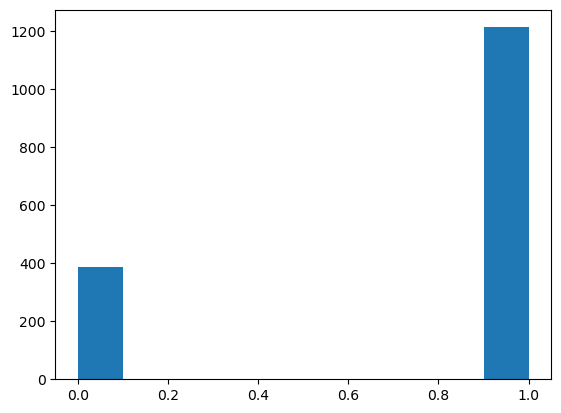

In [77]:
plt.hist(data.train)

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
train , test = data[data["train"] == True ] , data[data["train"] == False]

In [80]:
tree = DecisionTreeClassifier(criterion="entropy" , min_samples_split=25 , random_state=42)
tree.fit(train[predictoras] , train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=25,
                       random_state=42)

In [81]:
preds = tree.predict(test[predictoras])
pd.crosstab(test[target] , preds, rownames=["actual"] , colnames=["predictions"])

predictions,3,4,5,6,7,8
actual,,,,,,
3,0,0,1,1,1,0
4,1,1,5,2,0,0
5,1,5,119,43,3,0
6,0,1,40,95,16,2
7,0,0,5,30,10,1
8,0,0,0,1,2,0


In [82]:
print(f"Eficacia del modelo: %{tree.score(test[predictoras], test[target])*100:.2f}")

Eficacia del modelo: %58.29


* ### Creamos una crostab para ver como se comportaron las predicciones.
* ### Vemos que el modelo tiene una mejora buena en comparación con lo dos modelos creados anteriormente
----

# LUEGO SEGUIREMOS HACIENDO RANDON FOREST PARA MEJORAR EL MODELO O REDES NEURONALES.